### Customer segmentation - Kmeans - Clusterização

Qual o comportamento dos clientes com o cartão de crédito? A proposta deste projeto é agrupar os clientes com características similares, de modo que os membros de um mesmo grupo possuem comportamentos parecidos no uso do cartão de crédito, mesmo que ainda não saibamos quais são.  
Credit Card Dataset for Clustering: [Link do dataset](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download)  

In [1]:
import pandas as pd

dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

Já podemos deletar atributos que não irão agregar o nosso modelo, como é o caso do cust_id e do tenure.

In [2]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


Aqui vamos fazer um trabalho de preenchimento desses valores faltosos. O fillna vai substituir todos os dados faltantes das colunas pelas respectivas medianas de suas próprias colunas.

In [3]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


Precisaremos fazer a normalização das características para deixa-las na mesma escala. A ideia é impedir inviesamentos e outliers. 

In [4]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


### Criação do modelo

Utilizaremos o K-means como algorítmo de clusterização.

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

Utilizaremos 3 métricas para a avaliação do nosso modelo: silhouette, davies bouldin e calinski harabasz. Na métrica de Silhouette, sabemos que o valor tem um intervalo que vai de -1 até 1, portanto se o cluster obter um valor positivo isso é um bom sinal.  

No caso da métrica de Davies Bouldin, quanto mais próximo de 0 o valor, melhor. Já para Calinski, é melhor que o valor seja o mais alto possível.

### Avaliando o modelo 

In [10]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36454479258047573


In [11]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)   

1.076046490609319


In [12]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.7903477169225


É difícil fazer qualquer avaliação se considerarmos apenas o valor "cru" das métricas, sem ter um parêmetro comparativo, dessa forma faremos uma a avaliação relativa. Compararemos o valor das métricas com base em configurações diferentes do nosso algorítimo. A ideia é que assim ajustemos os parâmetros do algoritimo para obtermos os melhores resultados. 

In [13]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [14]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272406833282915 1.3085812675178696 3526.44833712076


In [15]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36457855123236727 1.0755159151076559 3431.7891634368416


In [16]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.2550625877402529 1.2150432309876 1615.6498348307746


Escolhemos as métricas do modelo que melhor se ajusta as nossas métricas de avaliação. Vamos comparar o modelo escolhido com um modelo aleatório. A ideia é ter um baseline comparativo. 

In [73]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03999452192064097 3.480046573190806 303.57561048515953
0.36457855123236727 1.0755159151076559 3431.7891634368416


Nosso próximo passo é validar a estabilidade do cluster. A ideia é que dividamos a base de dados e executemos o kmeans para cada uma dessas divisões a fim de obtermos resultados similares para as métricas, pois queremos que o kmeans se comporte similarmente em cada uma para conseguirmos a validação.

In [75]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36897094584161894 1.0581656052369077 1204.0560966145406
0.35416642754504835 1.138230644599316 1194.9519865048878
0.36685269244474583 1.0988027839846315 1167.5299723518192


### Análise visual

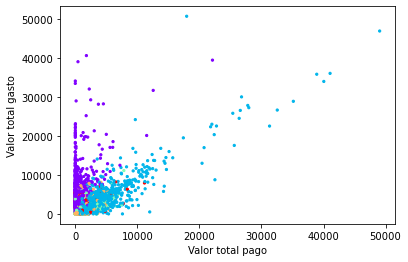

In [18]:
#as vezes é preciso executar duas vezes esse trecho para a imagem aparecer na tela
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

Plotando um único gráfico fica difícil fazer a diferenciação entre os clusters e desse modo tirar alguma conclusão definitiva.

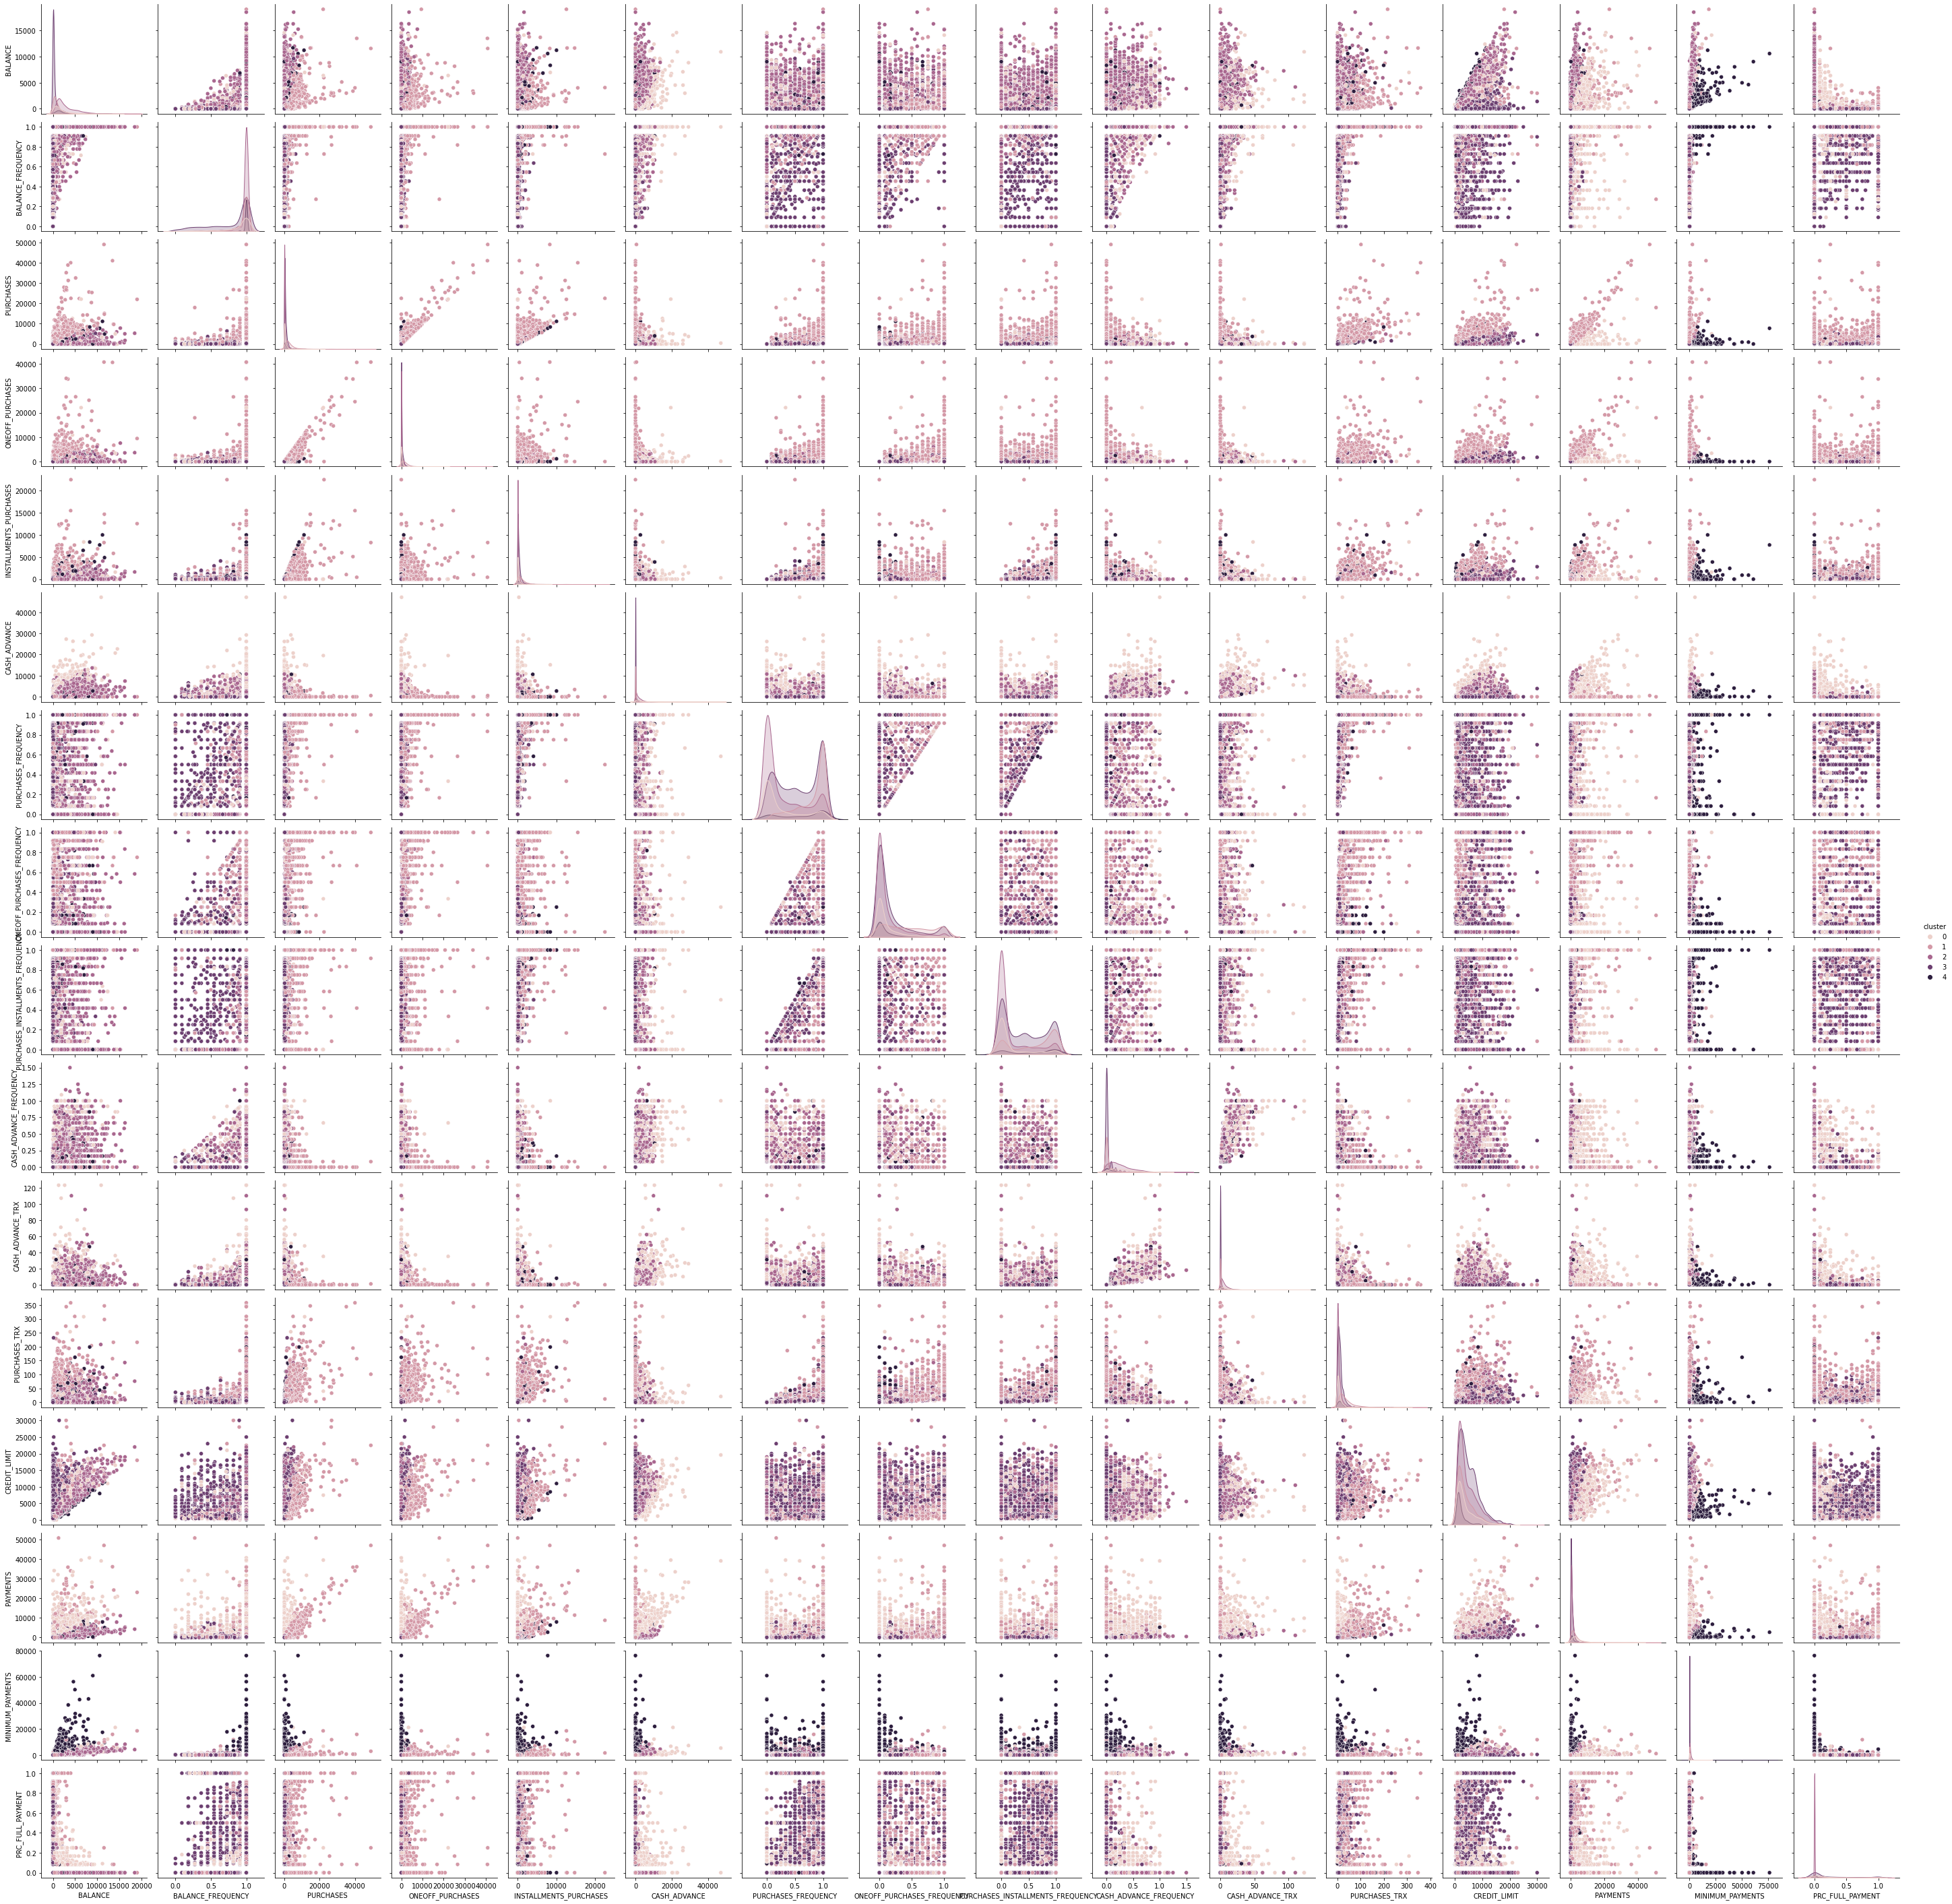

In [20]:
#é normal demorar bastante para executar o pairplot
#e se aparecer uma mensagem em vermelho do tipo "RuntimeWarning", pode ignorar e continue esperando que uma hora os gráficos vão aparecer :)
import seaborn as sns
dataframe["cluster"] = kmeans.labels_
sns.pairplot(dataframe[0:], hue="cluster")

In [23]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1073.0  1795.328292  1982.485775   0.000000   507.076999   
1        1536.0  1141.865757  1664.809840   0.000000   212.178230   
2        2650.0  3036.946177  2478.922442   6.824905  1255.154881   
3        3279.0   443.776995   846.525522   0.000000    23.340435   
4         412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1088.056301  2315.003636  14581.459140            1073.0  0.862260   
1         554.332740  1370.056708  19043.138560            1536.0  0.928220   
2        2173.994774  4223.858877  18495.558550            2650.0  0.963514   
3          82.902896   410.659944   9630.367575            3279.0  0.774514   
4        1338.918346  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       884.183626  21235.065300           1073.0  0.117430   
1        ...       523.540210  18621.013310           1536.0  0.278331   
2        ...      1330.541571   8345.641905           2650.0  0.001798   
3        ...       248.766884   4483.503862           3279.0  0.246881   
4        ...      7086.774783  76406.207520            412.0  0.019271   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.186772  0.0  0.0  0.083333  0.142857  1.0  
1        0.367137  0.0  0.0  0.083333  0.545455  1.0  
2        0.023256  0.0  0.0  0.000000  0.000000  0.6  
3        0.346775  0.0  0.0  0.000000  0.444444  1.0  
4        0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

No balance (limite desponível na conta de um cliente) podemos percerber que o cluster 2 as pessoas tem menos limite disponível na conta, mas também é o que possue um maior número de pessoas. Fazer uma análise deste tipo com muitos atributos também fica difícil. Seria conveniente pegarmos os atributos com maiores pesos/influência. 

In [24]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.35130689e-01 2.16418717e-04 6.04525670e-02 3.44569238e-02
  2.60008529e-02 3.99755165e-01 5.26563547e-05 2.05235176e-05
  3.52245850e-05 6.54254245e-05 1.57052528e-03 1.12425758e-03
  5.35275552e-01 5.98057989e-01 1.04294158e-01 2.77348362e-05]
 [1.60105064e-01 2.45216495e-04 4.38561405e-01 2.57200631e-01
  1.81532508e-01 2.58728121e-02 2.04312848e-04 8.90625500e-05
  1.50516286e-04 9.39341912e-06 1.69901859e-04 6.17654349e-03
  6.03940941e-01 4.02431241e-01 8.53054178e-02 7.19457109e-05]
 [5.03886149e-01 2.72144714e-04 6.15751915e-02 3.61893482e-02
  2.54075483e-02 2.53219709e-01 6.71312176e-05 2.56644637e-05
  4.48814714e-05 5.75359114e-05 1.15794119e-03 1.32612254e-03
  7.19404134e-01 1.66061928e-01 1.79050745e-01 5.79660872e-07]
 [6.89799575e-02 2.30763006e-04 1.21587120e-01 4.79794677e-02
  7.37079733e-02 2.40200669e-02 1.73016299e-04 3.36944404e-05
  1.40456777e-04 7.83464589e-06 1.22859223e-04 2.86637386e-03
  9.43639117e-01 1.53810130e-01 5.68564456e-02 7.61967577e-05]
 [3.

Aqui temos o valor centroide de cada atributo em cada cluster. Vamos observar a variancia dos centroides para um determinado atributo. Como determinado atributo se comporta em relação aos 5 clusters? O que nos interessa são os atributos com maior variação entre clusters, porque eles tem uma maior chance de revelar as particularidades de cada um dos clusters. 

In [34]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0541
PRC_FULL_PAYMENT 
0.0000


As variáveis mais relevantes são:  

Balance - Limite disponível do cliente.  
Purchaces - Valor total de compras.  
cash_advance - Valor total de saques.  
credit_limit - limite de crédito total.  
payments - valor total pago.  
minimum_payments - valor mínimo pago (fatura). Não é muito relevante para nosso interpretação, então não vamos utiliza-la.  

Faremos uma análise descritiva baseando-se na média dessas variáveis. 

In [68]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size() # Serie com o tamanho de cada cluster
description = description.mean()
description['n_clients'] = n_clients
description

C:\Users\BlueShift\AppData\Local\Temp\ipykernel_15372\1842072336.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   
1        1141.865757  3274.071901    183.496011   4098.802182  3037.137165   
2        3036.946177   385.299102   1637.380994   4495.584906   968.775192   
3         443.776995   629.282729    140.652097   5130.892579   814.340168   
4        1987.146873   858.326286    420.107194   2226.699029  1338.974045   

         n_clients  
cluster             
0             1073  
1             1536  
2             2650  
3             3279  
4              412

Que tipo de insights podemos tirar?  

CLUSTER 0: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 1: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes

CLUSTER 4: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

In [74]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        1073.0  0.117430  0.186772  0.0  0.0  0.083333  0.142857  1.0
1        1536.0  0.278331  0.367137  0.0  0.0  0.083333  0.545455  1.0
2        2650.0  0.001798  0.023256  0.0  0.0  0.000000  0.000000  0.6
3        3279.0  0.246881  0.346775  0.0  0.0  0.000000  0.444444  1.0
4         412.0  0.019271  0.090795  0.0  0.0  0.000000  0.000000  1.0

Deste modo conseguimos entender que tipo de características nossos clusters possuem. Quais tipos de características foram agrupadas. Agora o próximo passo a se pensar é: Como poderíamos usar essas informações em um situação estratégica de negócio? Melhorar o lucro da empresa, por exemplo. Em uma análise inicial o grupo mais adequado para isso, talvez, seria o cluster 1, afinal ele possui o maior número de clientes, são bons pagadores, bom limite de crédito, mas gastam pouco. Nossa ideia é engajar esse grupo para que ele utilize mais o cartão de crédito.  

Então o processo de clusterização foi utilizado em uma base de dados não rotulada com o objetivo de encontrar padrões de comportamentos nos clientes. A partir disso é possível conversar com as demais áreas da empresa para discutir as estratégias a serem tomadas com base nas análises feitas. 